<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Modulo2/Modulo2_Aulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importando as bibliotecas Pandas e matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# encoding é usado para informar a padronização utilizada no arquivo
# thousands e decimal são utilizados para indicar qual o separador de milhar e casas decimais usado no arquivo
dados_atd = pd.read_csv('https://raw.githubusercontent.com/EltonGS/Bootcamp-Data-Science-Alura/main/atendimento.csv', encoding='ISO-8859-1',
                        skiprows = 3, sep=';',
                    skipfooter = 12, thousands = '.', decimal = ',') 

# mostrar os números do tipo float com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

colunas_usaveis = dados_atd.mean().index.tolist() 
colunas_usaveis.insert(0, 'Unidade da Federação')
usaveis = dados_atd[colunas_usaveis]
usaveis = usaveis.set_index('Unidade da Federação')
usaveis = usaveis.drop(['Total', '2021/Jan', '2021/Fev', '2021/Mar'], axis = 1)

usaveis['Total'] =  usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)
ordenado_por_total.index = ordenado_por_total.index.str[3:]

# Na coluna 2008/Jan vemos um valor muito acima do padrão para os estados, isso traz uma distorção na visualização dos dados
# selecionando o nome das colunas a partir de 2008/Jan
colunas_interessadas = ordenado_por_total.columns[6:]

# atribuindo o valor do dataframe informando as colunas a partir de 2008/Jan
ordenado_por_total = ordenado_por_total[colunas_interessadas]

# dividingo por 1 milhão para que o eixo Y fique mais simples de ler
ordenado_por_total_milhoes = ordenado_por_total / 1000000

usaveis.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,977224099.12
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,443631609.94
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,1872327626.21
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2693726.29,2671451.53

In [3]:
# buscando a última coluna que temos no ordenado por total. O número negativa conta do final para o início
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Dez'

In [4]:
gastos_ultimo_mes = ordenado_por_total[mes_mais_recente]
gastos_ultimo_mes.head()


Unidade da Federação
São Paulo           326846228.95
Minas Gerais        166376967.67
Paraná              122146256.92
Rio Grande do Sul   116833971.73
Rio de Janeiro       90567351.87
Name: 2020/Dez, dtype: float64

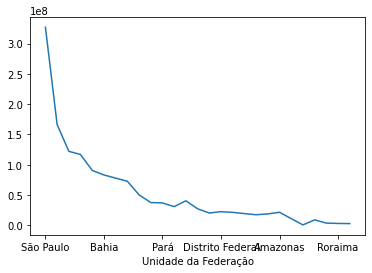

In [5]:
# o gráfico plotado do ultimo mês, sem modificação, não tem sentido algum por ter os estados no eixo X
gastos_ultimo_mes.plot()

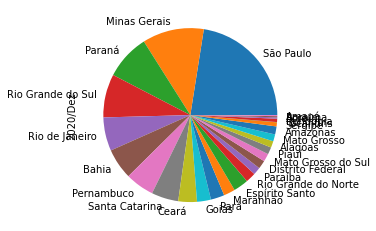

In [6]:
# plotando o gráfico com estilo pizza
gastos_ultimo_mes.plot(kind='pie')

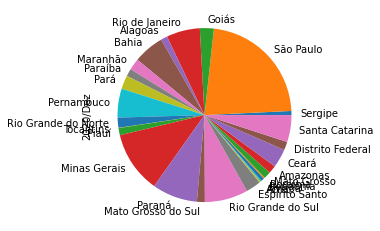

In [7]:
# como nosso dataframe está ordenado pelo total, o gráfico veio ordenado
# para que ele não esteja ordenado podemos usar o sample novamente para reordenar os valores na series
gastos_ultimo_mes.sample(frac=1).plot(kind='pie')

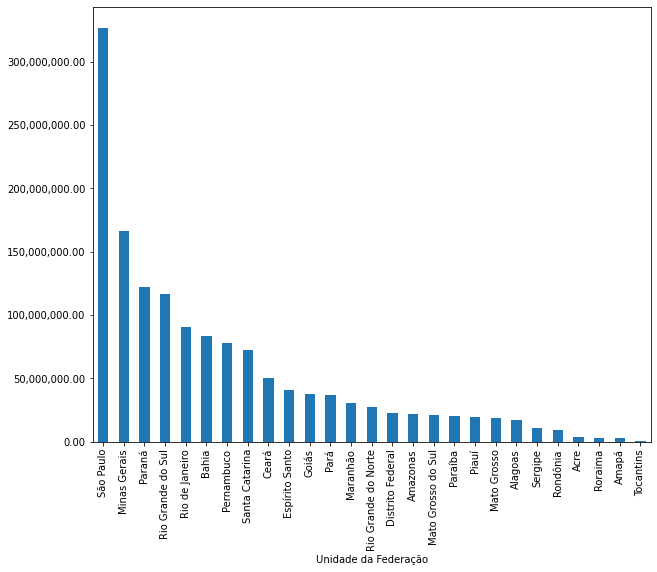

In [8]:
# ordenando os valores para plotar o gráfico e assim a visualização ficar mais simples
gastos_ultimo_mes = gastos_ultimo_mes.sort_values(ascending=False)
ax = gastos_ultimo_mes.plot(kind='bar', figsize = (10, 8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# MÓDULO 2

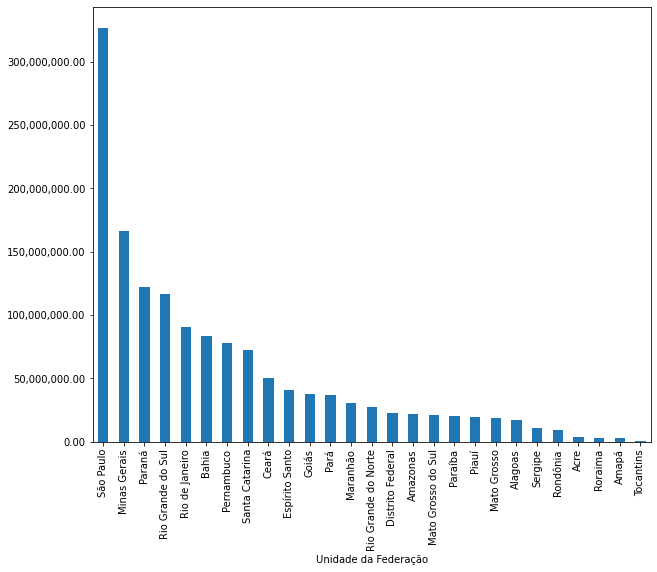

In [9]:
gastos_ultimo_mes = gastos_ultimo_mes.sort_values(ascending=False)
ax = gastos_ultimo_mes.plot(kind='bar', figsize = (10, 8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

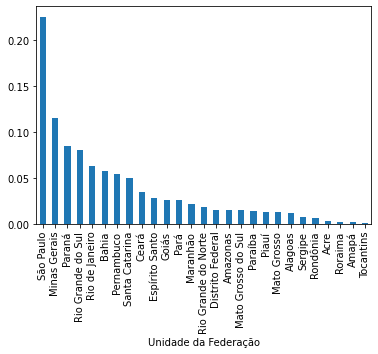

In [10]:
gastos_proporcionais = gastos_ultimo_mes / gastos_ultimo_mes.sum()
gastos_proporcionais.plot(kind='bar')

In [11]:
# para entrar dados em string que pegarão mais de uma linha coloca-se três aspas antes e três depois '''x'''
dados_da_populacao = '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)'''

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [12]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

dados_da_populacao = pd.read_csv(dados_da_populacao_io, sep='\t') # \t é o caracter especial para TAB

dados_da_populacao.head()


,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


In [13]:
dados_da_populacao = dados_da_populacao.rename(columns={'Unidade federativa':'uf', 'População' : 'populacao'})
dados_da_populacao.head()

,Posição,uf,populacao,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


In [14]:
dados_da_populacao = dados_da_populacao.drop(columns=['Posição', '% da pop. total', 'País comparável'])
dados_da_populacao.head()

,uf,populacao
0,NaN,NaN
1,São Paulo,46 289 333
2,Minas Gerais,21 292 666
3,Rio de Janeiro,17 366 189
4,Bahia Bahia,14 930 634


In [15]:
dados_da_populacao = dados_da_populacao.drop([0])
dados_da_populacao.head()

,uf,populacao
1,São Paulo,46 289 333
2,Minas Gerais,21 292 666
3,Rio de Janeiro,17 366 189
4,Bahia Bahia,14 930 634
5,Paraná,11 516 840


In [16]:
dados_da_populacao.set_index('uf', inplace=True)
dados_da_populacao.head()

,populacao
uf,
São Paulo,46 289 333
Minas Gerais,21 292 666
Rio de Janeiro,17 366 189
Bahia Bahia,14 930 634
Paraná,11 516 840


In [17]:
# podemos chamar funções de string (como a replace) com o comando str.function() / para converter para outro tipo de dados usamos o astype()
dados_da_populacao['populacao'] = dados_da_populacao['populacao'].str.replace(' ', '').astype(int)
dados_da_populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


In [18]:
dados_da_populacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


In [19]:
# alterando o index dos gastos_ultimo_mes pois queremos tirar os numeros da frente para poder unir com a series dados_da_populacao
#gastos_ultimo_mes.index = gastos_ultimo_mes.index.str[3:]

In [20]:
gastos_ultimo_mes = gastos_ultimo_mes / 1000000
gastos_ultimo_mes

Unidade da Federação
São Paulo             326.85
Minas Gerais          166.38
Paraná                122.15
Rio Grande do Sul     116.83
Rio de Janeiro         90.57
Bahia                  83.13
Pernambuco             77.88
Santa Catarina         72.72
Ceará                  50.27
Espírito Santo         40.50
Goiás                  37.61
Pará                   36.91
Maranhão               30.93
Rio Grande do Norte    27.28
Distrito Federal       22.55
Amazonas               21.55
Mato Grosso do Sul     21.39
Paraíba                20.36
Piauí                  19.35
Mato Grosso            18.85
Alagoas                17.46
Sergipe                11.00
Rondônia                9.00
Acre                    3.71
Roraima                 3.13
Amapá                   2.83
Tocantins               0.69
Name: 2020/Dez, dtype: float64

In [21]:
# se o join não está funcionando é possível que os index não estejam iguais
dados_da_populacao.join(gastos_ultimo_mes)

,populacao,2020/Dez
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


In [22]:
dados_da_populacao

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará Pará,8690745


In [23]:
# existe um espaço antes dos nomes dos estados na series dados_da_populacao
dados_da_populacao.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

In [24]:
# para retirar os espaço antes e depois de uma string tem a função strip()
dados_da_populacao.index = dados_da_populacao.index.str.strip()

In [25]:
dados_da_populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [26]:
# alguns estados vieram com o nome duplicado devido a configuração do código HTML na página de onde copiamos os dados
dados_da_populacao.join(gastos_ultimo_mes)

,populacao,2020/Dez
uf,,
São Paulo,46289333,326.85
Minas Gerais,21292666,166.38
Rio de Janeiro,17366189,90.57
Bahia Bahia,14930634,nan
Paraná,11516840,122.15
Rio Grande do Sul,11422973,116.83
Pernambuco,9616621,77.88
Ceará,9187103,50.27
Pará Pará,8690745,nan


In [27]:
# o indice da series gastos_ultimo_mes está correto e podemos utilizar ele como base para tratar esse index / pesquisar interpolação de strings
for estado in gastos_ultimo_mes.index:
  # print(f'{estado} {estado} => {estado}')
  dados_da_populacao.index = dados_da_populacao.index.str.replace(f'{estado} {estado}', estado)
dados_da_populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [28]:
populacao = dados_da_populacao.join(gastos_ultimo_mes)
populacao

,populacao,2020/Dez
uf,,
São Paulo,46289333,326.85
Minas Gerais,21292666,166.38
Rio de Janeiro,17366189,90.57
Bahia,14930634,83.13
Paraná,11516840,122.15
Rio Grande do Sul,11422973,116.83
Pernambuco,9616621,77.88
Ceará,9187103,50.27
Pará,8690745,36.91


# Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

# Desafio 02 - Neste desafio temos uma série de passos:

### Padronizar os nomes das colunas
### Transformar os dados nos tipos corretos
### Transformar a UF em index

Esse desafio já foi completo durante o curso da aula.

# Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

[Documentação Pandas - Trabalhando com texto](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

# Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

# Aula 2

In [29]:
populacao.head()

,populacao,2020/Dez
uf,,
São Paulo,46289333,326.85
Minas Gerais,21292666,166.38
Rio de Janeiro,17366189,90.57
Bahia,14930634,83.13
Paraná,11516840,122.15


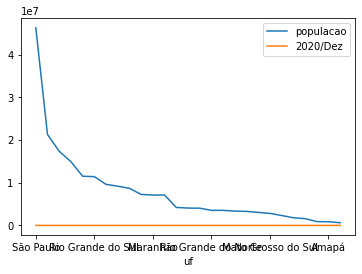

In [30]:
populacao.plot()

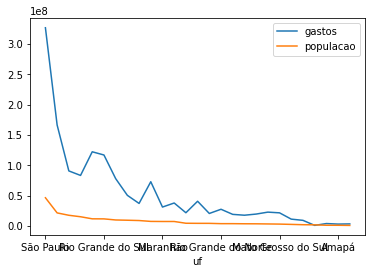

In [31]:
# um gráfico com o eixo y tendo 2 variáveis sem relação torna a visualização ruim // não usar eixo y secundário
populacao['gastos'] = populacao['2020/Dez'] * 1000000
populacao[['gastos', 'populacao']].plot()

In [32]:
# olhando o gráfico temos a impressão que sp tem um gasto por habitante muito maior que rs, por exemplo
# ao ver a tabela e calular o gasto por habitante vemos que não é isso que os dados mostram
populacao.loc[['São Paulo', 'Rio Grande do Sul']]

,populacao,2020/Dez,gastos
uf,,,
São Paulo,46289333,326.85,326846228.95
Rio Grande do Sul,11422973,116.83,116833971.73


In [33]:
# para verificar o real gasto por habitante dividimos os gastos totais pela populacao
populacao['gasto_por_habitante'] = populacao['gastos'] / populacao['populacao']
populacao.head()

,populacao,2020/Dez,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,326.85,326846228.95,7.06
Minas Gerais,21292666,166.38,166376967.67,7.81
Rio de Janeiro,17366189,90.57,90567351.87,5.22
Bahia,14930634,83.13,83131785.74,5.57
Paraná,11516840,122.15,122146256.92,10.61


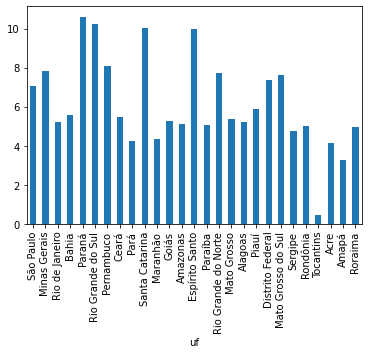

In [34]:
populacao['gasto_por_habitante'].plot(kind='bar')

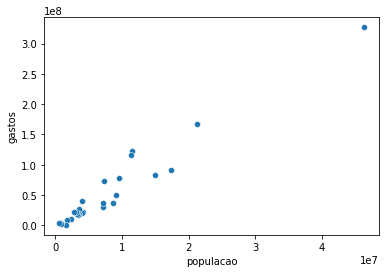

In [35]:
# importando o seaborn para plotar um gráfico scatterplo
import seaborn as sns

sns.scatterplot(data=populacao, x='populacao', y='gastos')

# na imagem podemos ver uma leve tendência entre a populacao e os gastos

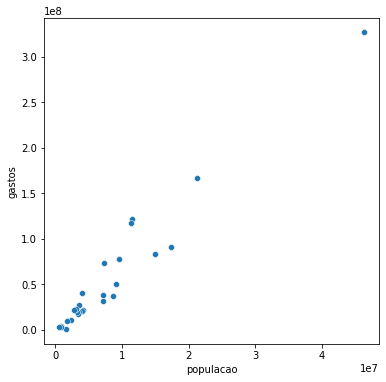

In [36]:
# para melhor visualizar essa tendência vamos plotar o gráfico em um quadrado

plt.figure(figsize=(6,6))
sns.scatterplot(data=populacao, x='populacao', y='gastos')


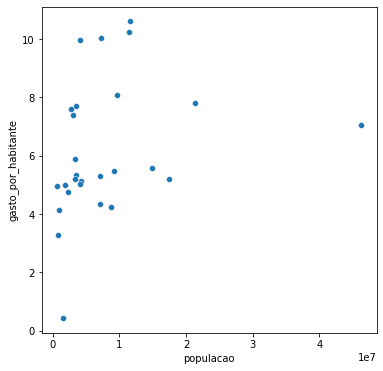

In [37]:
# plotando o mesmo gráfico agora com o gasto por habitante
plt.figure(figsize=(6,6))
sns.scatterplot(data=populacao, x='populacao', y='gasto_por_habitante')

# Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

In [38]:
populacao.head()

,populacao,2020/Dez,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,326.85,326846228.95,7.06
Minas Gerais,21292666,166.38,166376967.67,7.81
Rio de Janeiro,17366189,90.57,90567351.87,5.22
Bahia,14930634,83.13,83131785.74,5.57
Paraná,11516840,122.15,122146256.92,10.61


In [39]:
ordenado_gasto_habit = populacao.sort_values(by='gasto_por_habitante', ascending=False)
ordenado_gasto_habit.head()

,populacao,2020/Dez,gastos,gasto_por_habitante
uf,,,,
Paraná,11516840,122.15,122146256.92,10.61
Rio Grande do Sul,11422973,116.83,116833971.73,10.23
Santa Catarina,7252502,72.72,72720675.11,10.03
Espírito Santo,4064052,40.50,40500910.57,9.97
Pernambuco,9616621,77.88,77877186.72,8.10


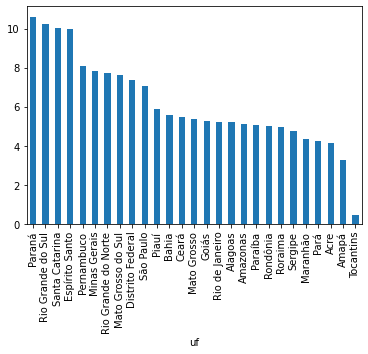

In [40]:
ordenado_gasto_habit['gasto_por_habitante'].plot(kind='bar')

# Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [41]:
dados_novembro = ordenado_por_total['2020/Nov']
#dados_novembro.index = dados_novembro.index.str[3:]
populacao['2020/Nov'] = dados_novembro
dados_novembro.index


Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

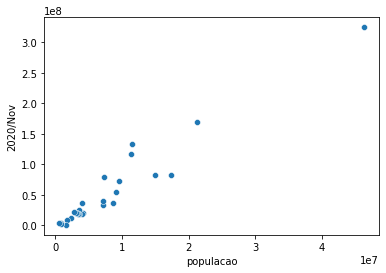

In [42]:
sns.scatterplot(data=populacao, x='populacao', y='2020/Nov')

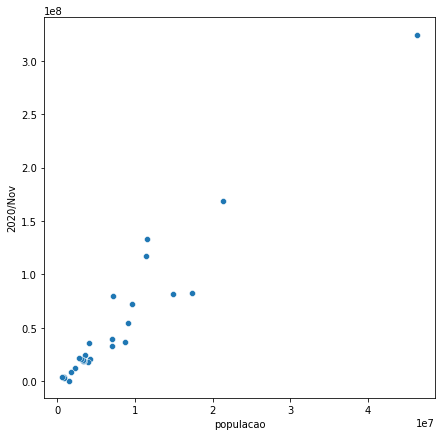

In [43]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=populacao, x='populacao', y='2020/Nov')

## Com os gráficos dos meses de novembro e dezembro de 2020 podemos ver que não existe uma grande variação de gasto por habitante nesse período.

## Essa pequena variação pode-se dar pela pouca variação na infraestrutura do SUS, dessa maneira o sistema sempre opera perto de sua capacidade máxima, ainda mais em um período de pandemia.

## Com os recursos do SUS sendo utilizados quase em sua totalidade, não deveríamos ver uma grande diferença de um mês para o outro.

# Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

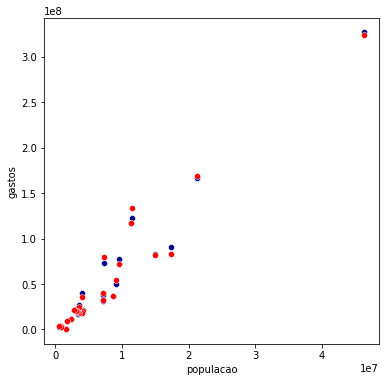

In [44]:
plt.figure(figsize=(6,6))
ax1 = sns.scatterplot(data=populacao, x='populacao', y='gastos', color='darkblue')
sns.scatterplot(data=populacao, x='populacao', y='2020/Nov', ax=ax1, color='red')

# Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

## Podemos ver que os gastos em comparação com a população segue uma tendência ao longo desse período.

## Acredito que isso seja mais perceptível por estarmos analisando um período curto (2 meses) entre esses dados. Dessa maneira não temos uma mudança significativa na infraestrutura do SUS e por estarmos em um périodo de pandemia o SUS está sob ainda maior estresse. Isso faz com que seus recursos estejam sendo utilizado quase em sua totalidade por um longo período de tempo, o que mantém os gastos praticamente iguais.

In [45]:
# criando uma função para automatizar o processo de criar novas colunas de gastos e gasto por habitante quando queremos ver outros meses
def gastos_gasto_por_habitante_para(todos_os_gastos, dados, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f'gastos_{mes}'] = gastos_do_mes
  dados[f'gastos_por_habitante_{mes}'] = dados[f'gastos_{mes}'] / dados['populacao']

In [46]:
gastos_gasto_por_habitante_para(ordenado_por_total, populacao, '2020/Ago')

In [47]:
populacao.head()

,populacao,2020/Dez,gastos,gasto_por_habitante,2020/Nov,gastos_2020/Ago,gastos_por_habitante_2020/Ago
uf,,,,,,,
São Paulo,46289333,326.85,326846228.95,7.06,324599773.40,350268671.25,7.57
Minas Gerais,21292666,166.38,166376967.67,7.81,168564708.16,182176122.99,8.56
Rio de Janeiro,17366189,90.57,90567351.87,5.22,82807309.85,89795469.41,5.17
Bahia,14930634,83.13,83131785.74,5.57,81866088.87,86230665.84,5.78
Paraná,11516840,122.15,122146256.92,10.61,133443307.36,125089468.62,10.86


# Aula 3

In [48]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,267354892.42,287435651.36,267262034.09,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,142294086.35,148327161.77,142323944.76,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,110720806.09,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01

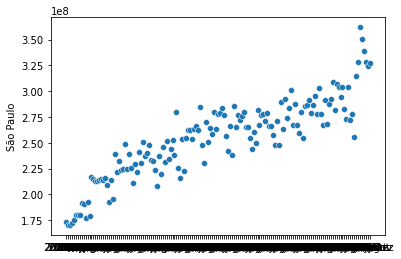

In [49]:
# o seaborn pode ser utilizado passando os parâmetros do x e y diretamente
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc['São Paulo'])

In [50]:
# para utilizar o seaborn de maneira padrão, podemos transpor o dataframe que está sendo usado.
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


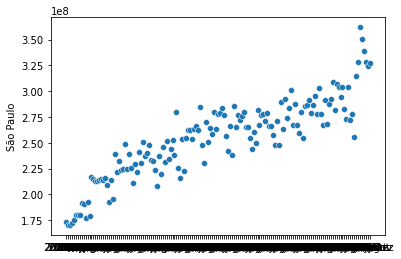

In [51]:
# com os dados transpostos temos as colunas como os estados e o index passou a ser os meses
# assim podemos passar 2 colunas para montar o gráfico. A coluna do Index e a coluna São Paulo
sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo')

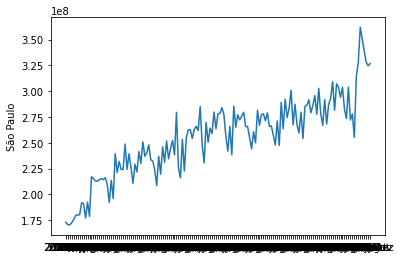

In [52]:
# para gráfico de linha no seaborn
sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')

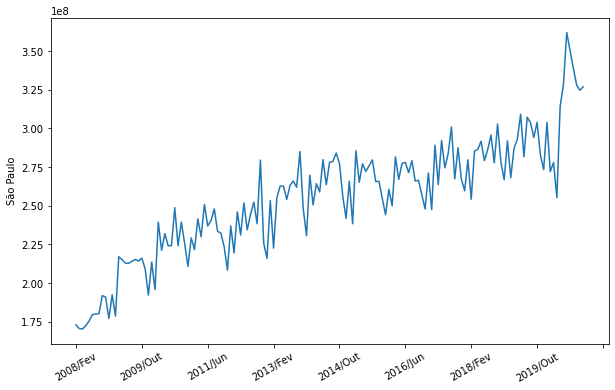

In [53]:
# melhorando a figura
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation = 30)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

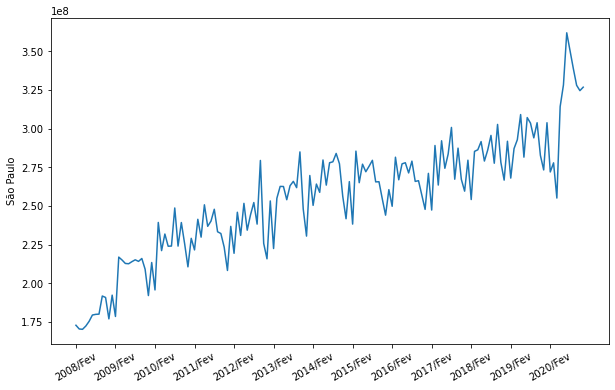

In [54]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation = 30)

#utilizado para controlar os ticks no eixo X / base é de quanto em quanto será colocado o tick e offset determinar a partir de qual ponto começar
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.show()

# Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

Text(0, 0.5, 'Gastos em reais (R$)')

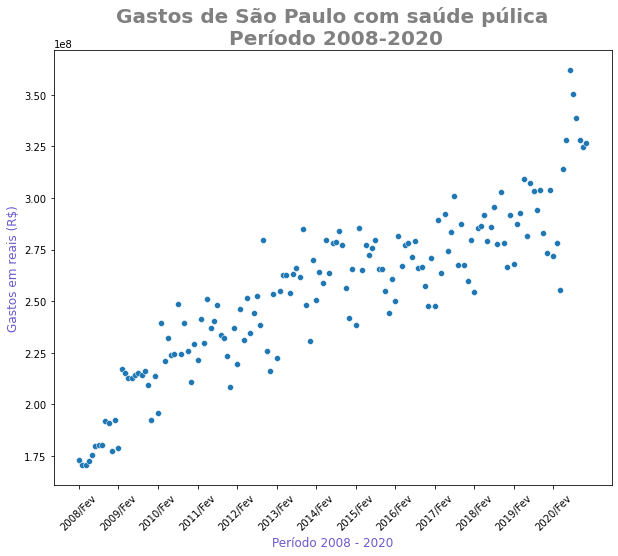

In [55]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo')
ax.set_title('Gastos de São Paulo com saúde púlica\n Período 2008-2020', fontsize=20, horizontalalignment='center', color='grey', weight='bold')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.xticks(rotation = 45)
ax.set_xlabel('Período 2008 - 2020', fontsize=12, c='slateblue')
ax.set_ylabel('Gastos em reais (R$)', fontsize=12, c='slateblue')

# Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

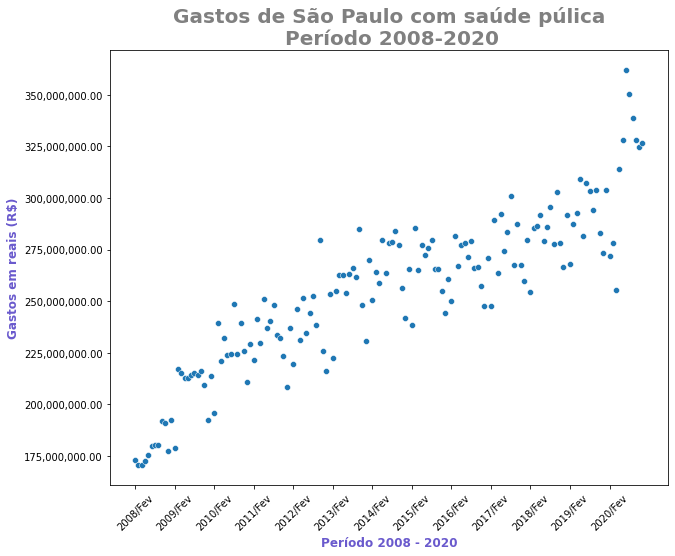

In [56]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo')
ax.set_title('Gastos de São Paulo com saúde púlica\n Período 2008-2020', fontsize=20, horizontalalignment='center', color='grey', weight='bold')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation = 45)
ax.set_xlabel('Período 2008 - 2020', fontsize=12, c='slateblue', weight='bold')
ax.set_ylabel('Gastos em reais (R$)', fontsize=12, c='slateblue', weight='bold')
plt.show()

# Aula 4

In [57]:
# os nossos dados estão separados por mês/ano, mas esse valor está registrado como uma string
# para tratar esses dados como datas precisamos do módulo datetime
# o padrão é deixar o datetime sem um apelido
import datetime

datetime.datetime(2020,11,3)

datetime.datetime(2020, 11, 3, 0, 0)

In [58]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [59]:
# para utilizar só as datas podemos importar somente o date
from datetime import date

date.today()

datetime.date(2021, 6, 8)

In [60]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [61]:
mensal.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul', '2020/Ago',
       '2020/Set', '2020/Out', '2020/Nov', '2020/Dez'],
      dtype='object', length=155)

In [62]:
# agora queremos trocar o nosso index por valores em datas
# para isso podemos criar um função para verificar o index e atribuir uma data pra esses valores
# para identificar o mês e relacionar em um número usaremos um dicionário

meses = { # nesse dicionário a função verificará qual o valor do mês no index e substituirá pelo número
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
    }

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4]) # aqui serão verificado os quatro primeiros caracteres do index que se refere ao ano
  mes: str = ano_mes[5:] # aqui o index será verificado a partir do sexto caracter, onde faz referência ao mês
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


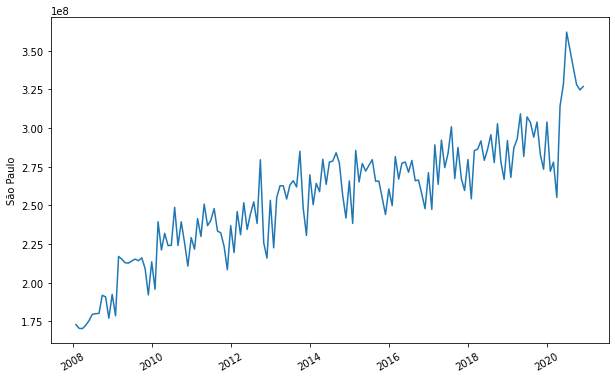

In [63]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation = 30)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.show()

# como nosso index é uma data, o pandas entende e mostra somente o ano no eixo X

In [64]:
# no info podemos ver que o index agora é um intervalo de data
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 2008-02-01 to 2020-12-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            155 non-null    float64
 1   Minas Gerais         155 non-null    float64
 2   Paraná               155 non-null    float64
 3   Rio Grande do Sul    155 non-null    float64
 4   Rio de Janeiro       155 non-null    float64
 5   Bahia                155 non-null    float64
 6   Pernambuco           155 non-null    float64
 7   Santa Catarina       155 non-null    float64
 8   Ceará                155 non-null    float64
 9   Goiás                155 non-null    float64
 10  Pará                 155 non-null    float64
 11  Maranhão             155 non-null    float64
 12  Espírito Santo       155 non-null    float64
 13  Rio Grande do Norte  155 non-null    float64
 14  Paraíba              155 non-null    float64
 15  Distrito Federal     155 non-

In [65]:
# selecionando um item do index podemos ver que é um objeto datetime
mensal.index[0]

datetime.date(2008, 2, 1)

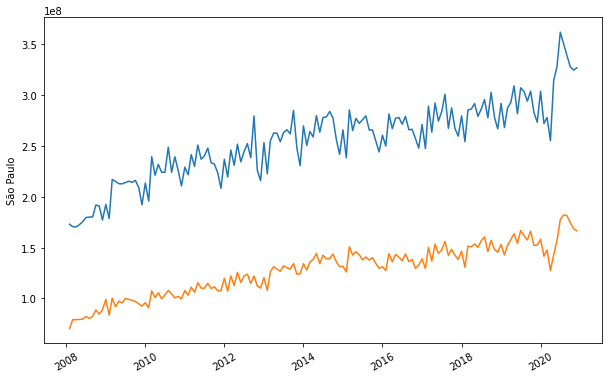

In [66]:
# para plotar um gráfico no seaborn é necessário passar um valor para X e outro para Y
# dessa maneira não conseguimos plotar, de maneira correta, os gastos de 2 estados no mesmo gráfico
# o gráfico não traz informação sobre o que é cada uma das linhas, o eixo y com o nome incorreto
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax = sns.lineplot(data=mensal, x=mensal.index, y='Minas Gerais')
plt.xticks(rotation = 30)
plt.show()

In [67]:
# para diminuir o número de colunas que temos em nosso dataframe existe o melt no python
# o melt pegará as colunas do dataframe e transformar cada item em uma linha
# aqui ele criará uma coluna para o estado, outra para a data, e outra para o gasto
# e assim para da um dos estados. O gasto de fevereiro de 2008 estava em uma linha, após o melt você terá uma linha para cada estado

mensal.reset_index() # redefinindo o index para ter uma coluna separada com os valores dos meses

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
1,2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2,2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
3,2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
4,2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-08-01,350268671.25,182176122.99,125089468.62,111762290.19,89795469.41,86230665.84,76091056.19,75061205.12,55118185.83,47568155.41,38793393.54,32711259.43,36405257.36,25721339.11,19346119.89,23875303.68,22608351.55,22452255.50,16706034.11,20936140.39,18687233.58,12434101.29,6488927.84,11433467.56,3658265.59,3262354.34,2702550.32
151,2020-09-01,338872478.49,181422500.43,121771167.11,110107867.30,81886688.22,78135509.62,73964434.93,67838476.77,53827491.88,47951326.80,36965951.76,31985709.32,34491126.71,25098604.18,17712791.83,21771866.33,21519151.07,20636997.20,17201473.11,20176196.43,18628627.49,11488626.57,4229376.60,8876900.39,3470409.45,2978629.22,2533445.46
152,2020-10-01,328055822.63,174585638.28,127506086.52,113886837.47,80570244.20,82912397.81,72356982.69,70993555.10,54679652.99,45304843.74,38406616.21,34430463.50,34800541.67,25257993.78,17427250.61,23087586.62,21825003.22,20326808.24,18109194.42,20387936.40,18728251.20,12571979.79,1853045.23,8167253.19,3267918.69,3313296.78,2762003.36
153,2020-11-01,324599773.40,168564708.16,133443307.36,116738266.69,82807309.85,81866088.87,71810830.78,79448753.69,54026288.42,39785408.90,37043032.10,32446802.41,35708727.33,24312931.74,17799651.06,20668526.36,21418665.16,20021998.76,18857578.34,18316623.02,20451573.77,11816872.93,509009.74,8759013.71,3393958.27,3527263.23,2714710.93


In [68]:
 # ao fazer o melt devemos indicar a coluna que não mudará após o melt com o parâmetro id_vars
 # o parâmetro value_vars indica com o que iremos ordenar nossa tabela
mensal_aberto = mensal.reset_index().melt(id_vars = ['index'], value_vars = mensal.columns)
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172961999.58
1,2008-03-01,São Paulo,170556696.16
2,2008-04-01,São Paulo,170338163.23
3,2008-05-01,São Paulo,172462057.87
4,2008-06-01,São Paulo,175492995.85


In [69]:
mensal_aberto['gasto'] = mensal_aberto['gasto'] / 1000000
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


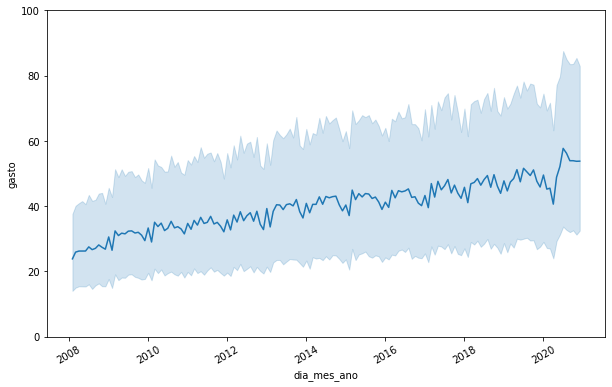

In [70]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal_aberto, x='dia_mes_ano', y='gasto')
plt.ylim(0, 100)
plt.xticks(rotation = 30)
plt.show()

# nesse gráfico temos diversos valores de gasto para o mesmo mês, assim o seaborn mostra uma média desses valores e um intervalo de confiança
# onde esses valores estão inseridos

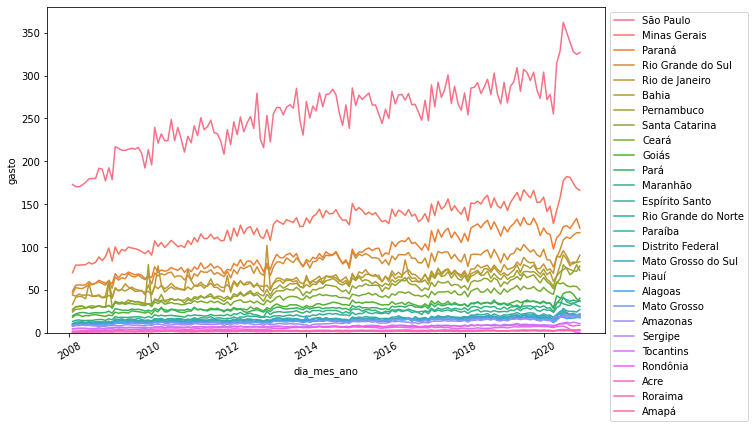

In [71]:
# para mostrarmos os valores para cada estado, podemos agrupar os valores de cada utilizando uma outra coluna
# o parâmetro hue é utilizado para isso. No nosso exemplo queremos agrupar os valores usando a coluna uf

plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal_aberto, x='dia_mes_ano', y='gasto', hue='uf')
plt.ylim(0)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

# Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [72]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


In [73]:
# após utilizar o melt podemos voltar um dataframe para o que era anteriormente usando as funções pivot() e pivot_table()
mensal_anterior = mensal_aberto.pivot_table(index=['dia_mes_ano'], columns=['uf'], values=['gasto'])
mensal_anterior.index.name = None
mensal_anterior.columns.name = None
mensal_anterior.head()

gasto                ...                            
uf          Acre Alagoas Amapá  ... Sergipe São Paulo Tocantins
2008-02-01  1.74    8.11  1.28  ...    4.64    172.96      5.05
2008-03-01  2.06    9.21  1.18  ...    5.02    170.56      5.20
2008-04-01  2.06   10.47  1.40  ...    5.27    170.34      5.34
2008-05-01  2.23    9.84  1.41  ...    5.37    172.46      5.34
2008-06-01  2.11   10.30  1.42  ...    4.98    175.49      5.40

[5 rows x 27 columns]

# Desafio 03: Melhorar o gráfico da distribuição do gráfico:

- Escolha apenas alguns estados.
- Mude a palete de cores.
- Posicione a legenda de forma mais adequada.
- Adicione título principal e nos eixos x e y.

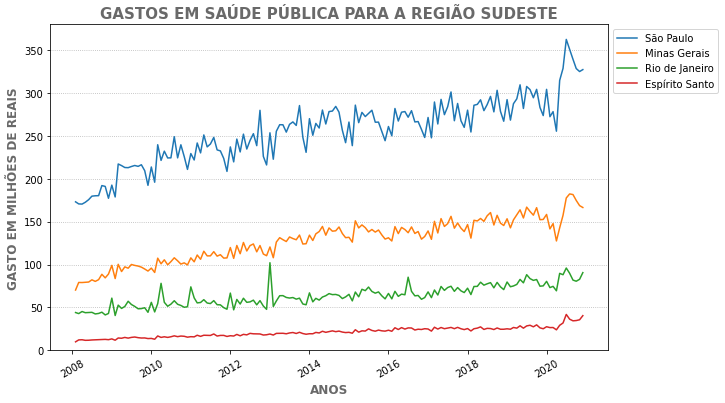

In [74]:
# para selecionar os estados que queremos no dataframe após o melt podemos fazer uma query buscando os valores que queremos
reg_sudeste = mensal_aberto.query("uf == 'São Paulo' or uf == 'Rio de Janeiro' or uf == 'Minas Gerais' or uf == 'Espírito Santo'")

plt.figure(figsize = (10, 6))
#sns.set_palette(list(sns.color_palette('husl', 4)))
ax = sns.lineplot(data=reg_sudeste, x='dia_mes_ano', y='gasto', hue='uf')
ax.set_xlabel('ANOS', fontsize=12, color='dimgrey', fontweight='bold')
ax.set_ylabel('GASTO EM MILHÕES DE REAIS', fontsize=12, color='dimgrey', fontweight='bold')
ax.set_title('GASTOS EM SAÚDE PÚBLICA PARA A REGIÃO SUDESTE', fontsize=15, fontweight='bold', color='dimgrey')
plt.ylim(0)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1,1))
plt.grid(which='major', axis='y', linestyle='dotted')
plt.show()

# Aula 5

### Agora que temos a coluna com o ano, mes e dia, podemos realizar análises por períodos de tempo. Como por ex, comparar os gastos de SP ano a ano.

In [75]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


In [76]:
# para separar o ano e mês é usado os parâmetros dt.month e dt.year
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.96,2,2008
1,2008-03-01,São Paulo,170.56,3,2008
2,2008-04-01,São Paulo,170.34,4,2008
3,2008-05-01,São Paulo,172.46,5,2008
4,2008-06-01,São Paulo,175.49,6,2008


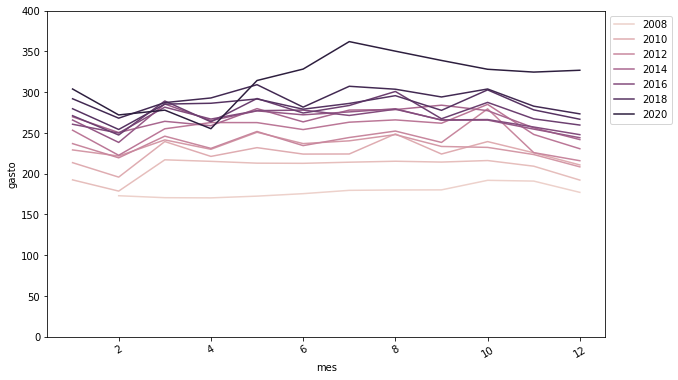

In [77]:
# plotando um gráfico para cada ano para o estado de São Paulo
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x='mes', y='gasto', hue='ano')
plt.ylim(0, 400)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [78]:
# podemos também calcula o gasto diário, já que os meses possuem mais ou menos dias e isso pode causar distorção no gráfico
# uma das maneiras de fazer isso é mapear com um dicionário a quantidade de dias usando a coluna "mes"
dias_do_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_do_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.96,2,2008,6.18
1,2008-03-01,São Paulo,170.56,3,2008,5.50
2,2008-04-01,São Paulo,170.34,4,2008,5.68
3,2008-05-01,São Paulo,172.46,5,2008,5.56
4,2008-06-01,São Paulo,175.49,6,2008,5.85


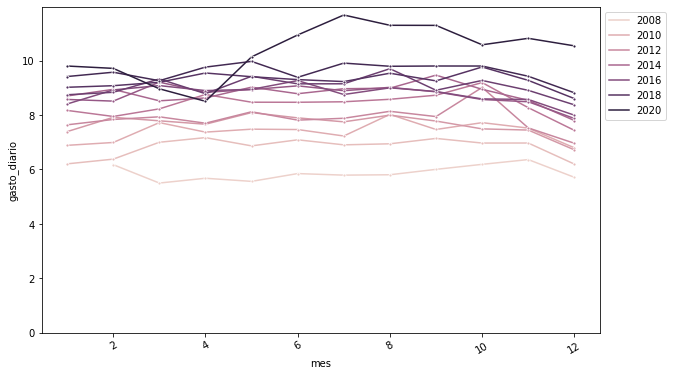

In [79]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x='mes', y='gasto_diario', hue='ano', marker='.')
plt.ylim(0)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

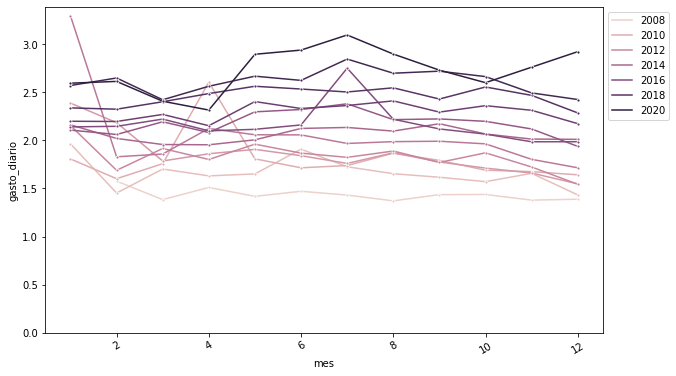

In [80]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'Rio de Janeiro'"), x='mes', y='gasto_diario', hue='ano', marker='.')
plt.ylim(0)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# Desafio 01: Melhorar o gráfico ano a ano:

- Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

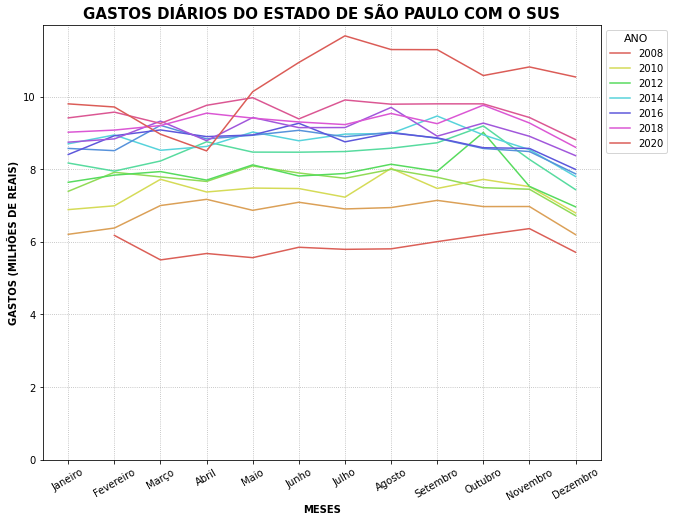

In [81]:
plt.figure(figsize = (10, 8))

ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x='mes', y='gasto_diario', hue='ano', palette='hls')

ax.set_title('GASTOS DIÁRIOS DO ESTADO DE SÃO PAULO COM O SUS', fontsize = 15, fontweight='bold')
ax.set_xlabel('MESES',  fontsize = 10, fontweight='bold')
ax.set_ylabel('GASTOS (MILHÕES DE REAIS)',  fontsize = 10, fontweight='bold')

plt.ylim(0)
plt.grid(which='major', linestyle='dotted')
plt.xticks(ticks=[1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
                                                            'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], rotation = 30)
plt.legend(bbox_to_anchor = (1,1), title='ANO', fontsize=10, title_fontsize=11)

plt.show()

  # Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

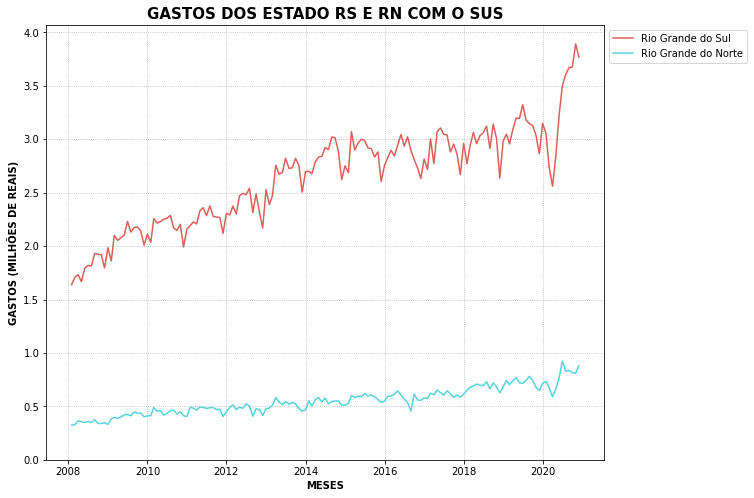

In [82]:
comparar_estados = mensal_aberto.query("uf == 'Rio Grande do Sul' or uf == 'Rio Grande do Norte'")

plt.figure(figsize = (10, 8))

ax = sns.lineplot(data=comparar_estados, x='dia_mes_ano', y='gasto_diario', hue='uf', palette='hls')

ax.set_title('GASTOS DOS ESTADO RS E RN COM O SUS', fontsize = 15, fontweight='bold')
ax.set_xlabel('MESES',  fontsize = 10, fontweight='bold')
ax.set_ylabel('GASTOS (MILHÕES DE REAIS)',  fontsize = 10, fontweight='bold')

plt.ylim(0)
plt.grid(which='major', linestyle='dotted')
#plt.xticks(ticks=[1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
#                                                            'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], rotation = 30)
plt.legend(bbox_to_anchor = (1,1), fontsize=10)

plt.show()

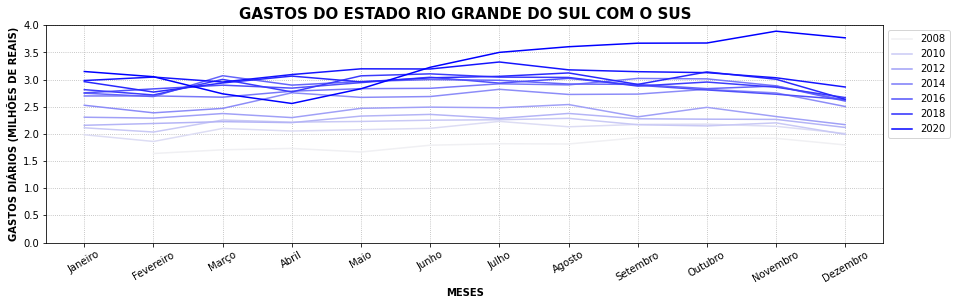

In [83]:
plt.figure(figsize = (15, 4))

ax = sns.lineplot(data=comparar_estados.query("uf == 'Rio Grande do Sul'"), x='mes', y='gasto_diario', hue='ano', palette='light:b')

ax.set_title('GASTOS DO ESTADO RIO GRANDE DO SUL COM O SUS', fontsize = 15, fontweight='bold')
ax.set_xlabel('MESES',  fontsize = 10, fontweight='bold')
ax.set_ylabel('GASTOS DIÁRIOS (MILHÕES DE REAIS)',  fontsize = 10, fontweight='bold')

plt.ylim(0)
plt.grid(which='major', linestyle='dotted')
plt.xticks(ticks=[1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
                                                            'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], rotation = 30)
plt.legend(bbox_to_anchor = (1,1), fontsize=10)

plt.show()

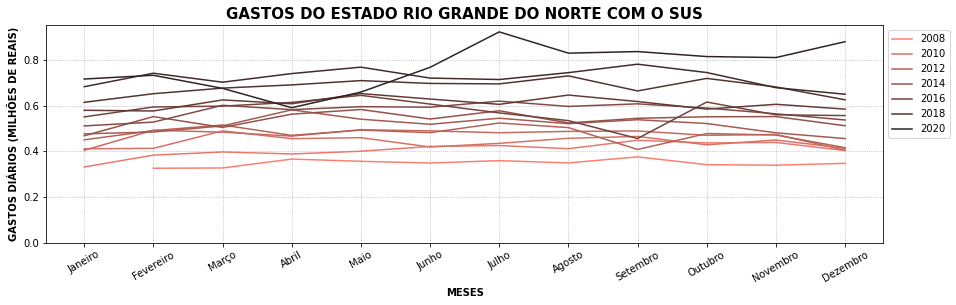

In [84]:
plt.figure(figsize = (15, 4))

ax = sns.lineplot(data=comparar_estados.query("uf == 'Rio Grande do Norte'"), x='mes', y='gasto_diario', hue='ano', palette='dark:salmon_r')

ax.set_title('GASTOS DO ESTADO RIO GRANDE DO NORTE COM O SUS', fontsize = 15, fontweight='bold')
ax.set_xlabel('MESES',  fontsize = 10, fontweight='bold')
ax.set_ylabel('GASTOS DIÁRIOS (MILHÕES DE REAIS)',  fontsize = 10, fontweight='bold')

plt.ylim(0)
plt.grid(which='major', linestyle='dotted')
plt.xticks(ticks=[1 , 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
                                                            'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], rotation = 30)
plt.legend(bbox_to_anchor = (1,1), fontsize=10)

plt.show()

# AULA 6

In [85]:
# agora podemos analisar os gastos por ano de determinado estado
estado_a_analisar = mensal_aberto.query("uf == 'São Paulo'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.96,2,2008,6.18
1,2008-03-01,São Paulo,170.56,3,2008,5.50
2,2008-04-01,São Paulo,170.34,4,2008,5.68
3,2008-05-01,São Paulo,172.46,5,2008,5.56
4,2008-06-01,São Paulo,175.49,6,2008,5.85


In [86]:
# para agrupar todos os valores que temos por ano usamos a função groupby e depois informamos o que fazer com os outros dados
# quando utilizamos o groupby a coluna informada se tornará o index da nova series
gastos_por_ano = estado_a_analisar.groupby('ano').sum()

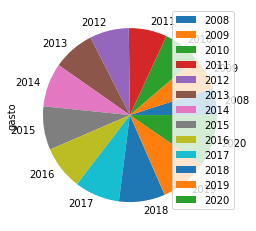

In [87]:
gastos_por_ano.plot(kind='pie', y='gasto')

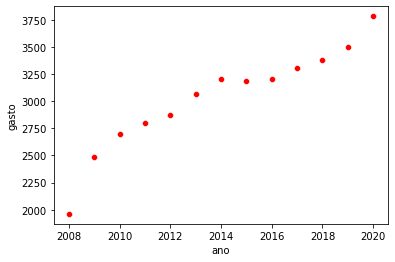

In [88]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', color='red')

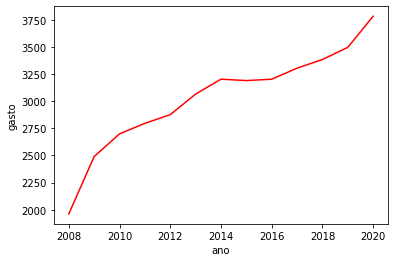

In [89]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', color='red')

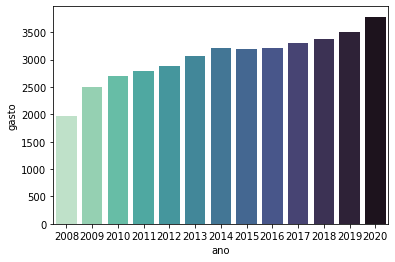

In [90]:
sns.barplot(data = gastos_por_ano, x = gastos_por_ano.index, y = 'gasto', palette = sns.color_palette("mako_r", 13))

In [91]:
# podemos também verificar a informação para alguns estados
estados = ['São Paulo', 'Rio de Janeiro', 'Pernambuco']

# para chamar a variável dentro da query usamos o @ / e como teremos estados diferentes, primeiro agrupamos pela coluna uf e depois pelo ano
por_ano_dos_estados = mensal_aberto.query("uf == @estados").groupby(['uf', 'ano']).sum().reset_index()

In [92]:
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Pernambuco,2008,333.10,77,10.97
1,Pernambuco,2009,443.70,78,14.57
2,Pernambuco,2010,500.36,78,16.41
3,Pernambuco,2011,502.29,78,16.51
4,Pernambuco,2012,538.82,78,17.71


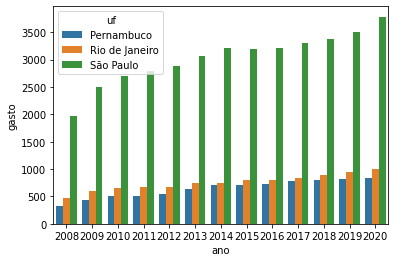

In [93]:
# plotamos o gráfico com os três estados separando no hue com a coluna uf
sns.barplot(data = por_ano_dos_estados, x = 'ano', y = 'gasto', hue='uf')

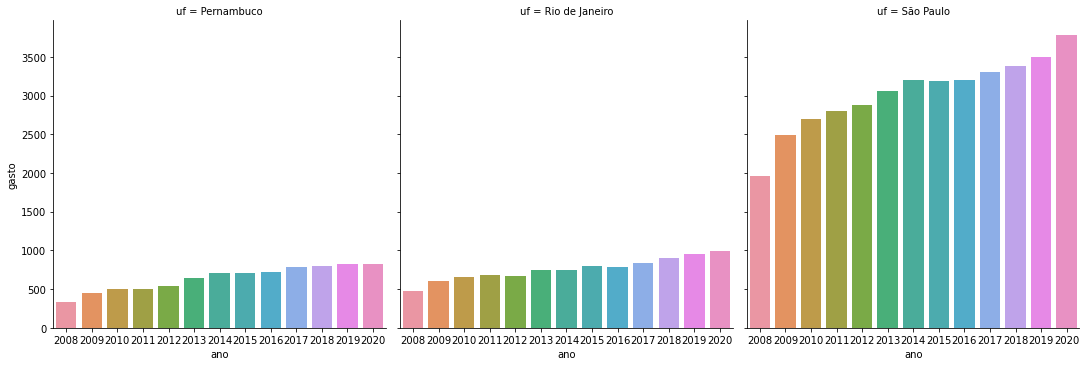

In [94]:
# como os três estados são categorias que estamos analisando, podemos plotar um gráfico de categorias
# passamos no parâmetro col qual coluna usaremos para diferenciar os gráficos em colunas
sns.catplot(data = por_ano_dos_estados, x = 'ano', y = 'gasto', col='uf', kind='bar')

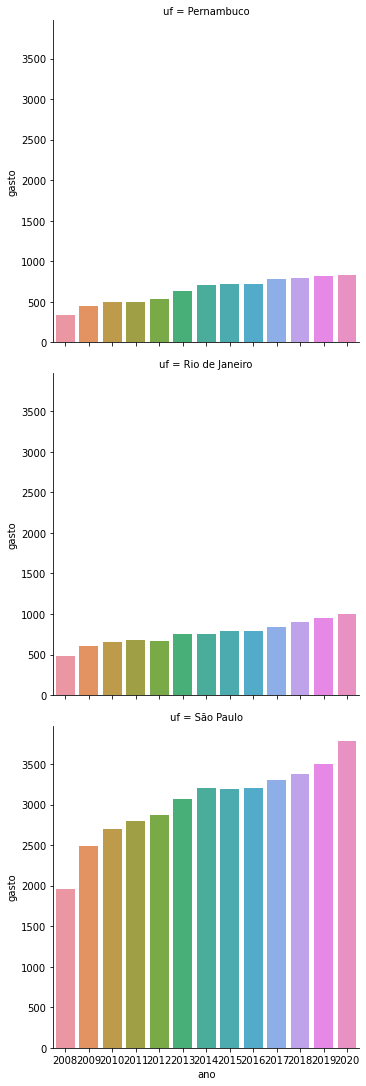

In [95]:
# pode ser ordenado em linhas também
sns.catplot(data = por_ano_dos_estados, x = 'ano', y = 'gasto', row='uf', kind='bar')

# Desafio 01: Reordenar as cores pelo valor do eixo y.



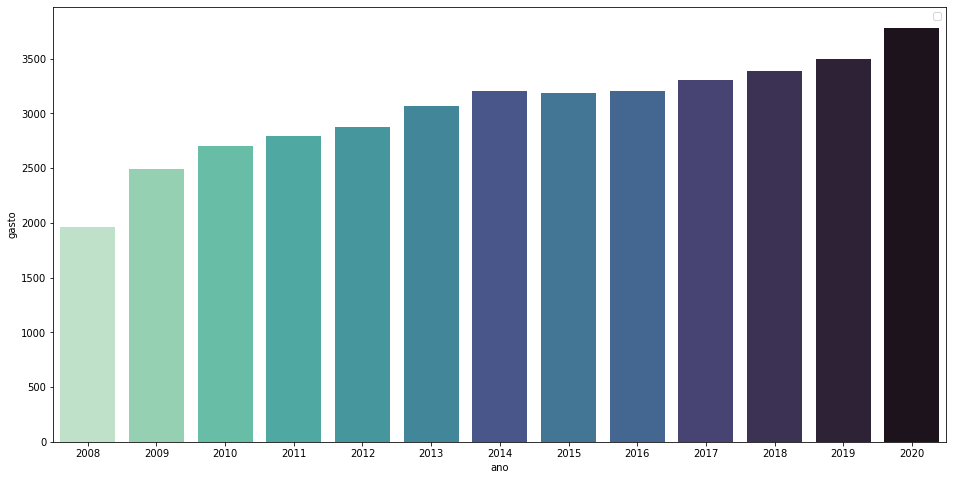

In [96]:
plt.figure(figsize=(16,8))

# para que a paleta de cores seja diferente seguindo os gastos, setamos o hue (a diferenciação) como gastos
sns.barplot(data = gastos_por_ano, x = gastos_por_ano.index, y = 'gasto', hue='gasto', dodge=False, palette = sns.color_palette("mako_r", 13))
plt.legend('')

# Desafio 02: Explorar a documentação do Seaborn.



[Documentação Seaborn](https://seaborn.pydata.org/index.html)

# Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

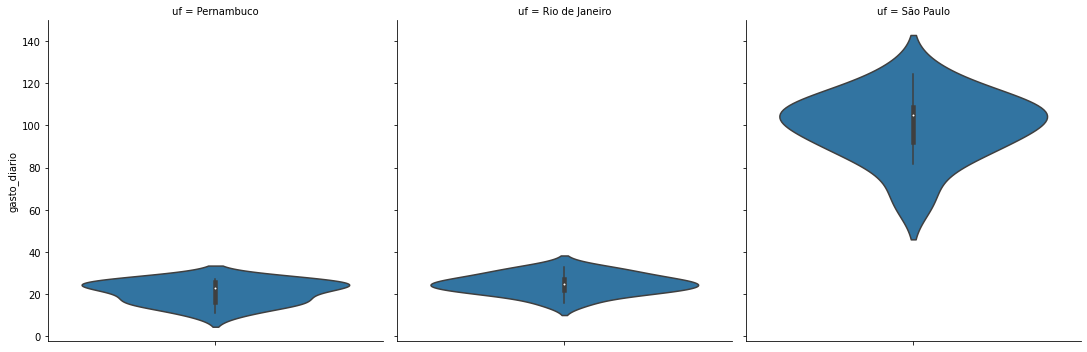

In [113]:
sns.catplot(data=por_ano_dos_estados, y='gasto_diario', kind='violin', col='uf', hue='uf')

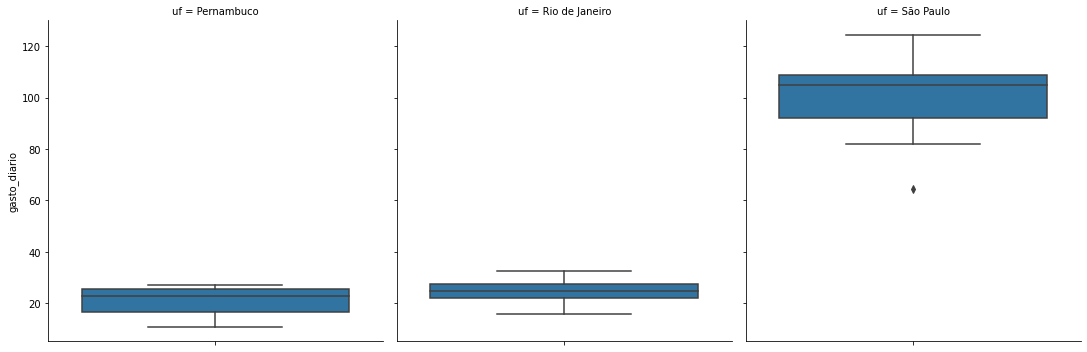

In [111]:
sns.catplot(data=por_ano_dos_estados, y='gasto_diario', kind='box', col='uf')

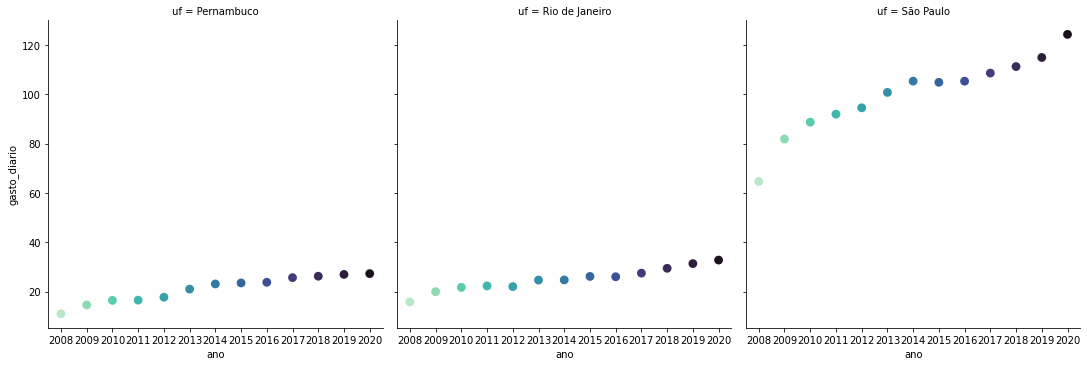

In [127]:
ax = sns.catplot(data=por_ano_dos_estados, y='gasto_diario', x='ano', col='uf', kind='point', palette='mako_r')
plt.legend('',frameon=False)

# Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.

